In [25]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "svg"
import arviz as az

In [26]:
df = pd.read_csv("https://raw.githubusercontent.com/arnavtolat/qss_thesis_data/main/2020Q2_BVAL_TSY.csv")
df = df.dropna(subset=["FED Purchase Price"])
df['DIFFERENCE'] = df['DIFFERENCE'].astype(float)
df['BVAL PRICE'] = df['BVAL PRICE'].astype(float)
df['FED Purchase Price'] = df['FED Purchase Price'].astype(float)

In [27]:
df

,Trade date,Settlement date,YYMMDD_DATE,Transaction category,"Trade amount (in millions, USD)",Issuer,Security description,CUSIP,BVAL PRICE,FED Purchase Price,DIFFERENCE,"Accrued interest (in dollars, USD)","Total amount transferred (in millions, USD)",Counterparty
0,Apr 01 2020,Apr 02 2020,200401,Purchase,50.0,TSY,TN 01.625 02/15/26,912828P46,106.804688,106.730469,0.074219,"104,910.71",53.5,HSBC Securities (USA) Inc.
1,Apr 01 2020,Apr 02 2020,200401,Purchase,14.0,TSY,TN 02.625 02/15/29,9128286B1,117.812500,117.800781,0.011719,"47,451.92",16.5,"BofA Securities, Inc."
2,Apr 01 2020,Apr 02 2020,200401,Purchase,25.0,TSY,TN 02.375 05/15/29,9128286T2,116.007812,115.968750,0.039062,"226,734.20",29.2,"BofA Securities, Inc."
3,Apr 01 2020,Apr 02 2020,200401,Purchase,25.0,TSY,TN 02.375 05/15/29,9128286T2,116.007812,115.984375,0.023438,"226,734.20",29.2,"BofA Securities, Inc."
4,Apr 01 2020,Apr 02 2020,200401,Purchase,25.0,TSY,TN 01.625 09/30/26,912828YG9,107.398438,107.453125,-0.054688,"2,219.95",26.9,HSBC Securities (USA) Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12609,Jun 30 2020,Jul 01 2020,200630,Purchase,25.0,TSY,IIN 00.625 07/15/21,912828QV5,101.769531,101.816406,-0.046875,"82,036.30",29.0,Morgan Stanley & Co. LLC
12610,Jun 30 2020,Jul 01 2020,200630,Purchase,25.0,TSY,IIN 00.125 07/15/24,912828WU0,104.523438,104.593750,-0.070312,"15,573.75",28.3,UBS Securities LLC.
12611,Jun 30 2020,Jul 01 2020,200630,Purchase,25.0,TSY,IIN 00.375 01/15/27,912828V49,107.890625,108.074219,-0.183594,"45,925.53",28.7,Barclays Capital Inc.
12612,Jun 30 2020,Jul 01 2020,200630,Purchase,25.0,TSY,IIN 00.375 01/15/27,912828V49,107.890625,108.089844,-0.199219,"45,925.53",28.7,Barclays Capital Inc.


In [28]:
# Calculate summary statistics
mean = df['DIFFERENCE'].mean()
median = df['DIFFERENCE'].median()
std = df['DIFFERENCE'].std()
variance = df['DIFFERENCE'].var()
abs_deviation = np.abs(df['DIFFERENCE'] - mean).mean()
iqr = df['DIFFERENCE'].quantile(0.75) - df['DIFFERENCE'].quantile(0.25)
distance_std = (np.abs(df['DIFFERENCE'] - mean) / std).mean()
range_ = df['DIFFERENCE'].max() - df['DIFFERENCE'].min()

# Create a dataframe to hold the summary statistics
summary_statistics = pd.DataFrame(
    {'Statistic': ['Mean', 'Median', 'Standard Deviation', 'Variance', 'Absolute Deviation', 'Interquartile Range', 'Distance Standard Deviation', 'Range'],
     'Value': [mean, median, std, variance, abs_deviation, iqr, distance_std, range_]})

# Print the summary statistics table
print(summary_statistics)

                     Statistic     Value
0                         Mean -0.043067
1                       Median -0.023438
2           Standard Deviation  0.505309
3                     Variance  0.255337
4           Absolute Deviation  0.252346
5          Interquartile Range  0.156250
6  Distance Standard Deviation  0.499389
7                        Range  5.832031


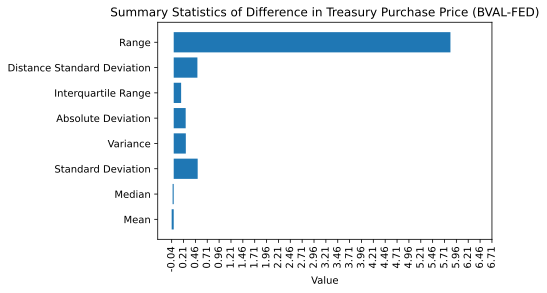

In [29]:
# Plot the summary statistics in a bar plot
plt.barh(summary_statistics['Statistic'], summary_statistics['Value'])
plt.xlabel('Value')
plt.title('Summary Statistics of Difference in Treasury Purchase Price (BVAL-FED)')

# Format the x-axis values to show 2 decimal places
plt.xticks(np.arange(min(summary_statistics['Value']), max(summary_statistics['Value'])+1, 0.25), 
           [f'{x:.2f}' for x in np.arange(min(summary_statistics['Value']), max(summary_statistics['Value'])+1, 0.25)], 
           rotation=90)

plt.show()

In [30]:
#Checking if there are any NA counterparties/missing values for that column
df['Counterparty'].isna().sum()

0

In [31]:
# Calculate the summary statistics for the column "DIFFERENCE"
mean = df['DIFFERENCE'].mean()
median = df['DIFFERENCE'].median()
std = df['DIFFERENCE'].std()
variance = df['DIFFERENCE'].var()
abs_deviation = df['DIFFERENCE'].abs().mean()
iqr = df['DIFFERENCE'].quantile(0.75) - df['DIFFERENCE'].quantile(0.25)
distance_std = (abs(df['DIFFERENCE'] - df['DIFFERENCE'].mean())/df['DIFFERENCE'].std()).mean()
range_ = df['DIFFERENCE'].max() - df['DIFFERENCE'].min()

# Create a summary statistics table
summary_statistics = pd.DataFrame(
    {'Statistic': ['Mean', 'Median', 'Standard Deviation', 'Variance', 'Absolute Deviation', 'Interquartile Range', 'Distance Standard Deviation', 'Range'],
     'Value': [mean, median, std, variance, abs_deviation, iqr, distance_std, range_]})

# Group the data by "Counterparty"
grouped = df.groupby('Counterparty')

# Create a list to store the summary statistics by counterparty
counterparty_statistics = []

# Calculate the summary statistics for each counterparty
for counterparty, data in grouped:
    mean = data['DIFFERENCE'].mean()
    median = data['DIFFERENCE'].median()
    std = data['DIFFERENCE'].std()
    variance = data['DIFFERENCE'].var()
    abs_deviation = data['DIFFERENCE'].abs().mean()
    iqr = data['DIFFERENCE'].quantile(0.75) - data['DIFFERENCE'].quantile(0.25)
    distance_std = (abs(data['DIFFERENCE'] - data['DIFFERENCE'].mean())/data['DIFFERENCE'].std()).mean()
    range_ = data['DIFFERENCE'].max() - data['DIFFERENCE'].min()
    counterparty_statistics.append({'Counterparty': counterparty,
                                    'Mean': mean,
                                    'Median': median,
                                    'Standard Deviation': std,
                                    'Variance': variance,
                                    'Absolute Deviation': abs_deviation,
                                    'Interquartile Range': iqr,
                                    'Distance Standard Deviation': distance_std,
                                    'Range': range_})

# Convert the list of dictionaries to a Pandas data frame
counterparty_statistics_df = pd.DataFrame(counterparty_statistics)

counterparty_statistics_df['Frequency'] = df['Counterparty'].value_counts().loc[counterparty_statistics_df['Counterparty']].values


counterparty_statistics_df

,Counterparty,Mean,Median,Standard Deviation,Variance,Absolute Deviation,Interquartile Range,Distance Standard Deviation,Range,Frequency
0,Amherst Pierpont Securities LLC,-0.005607,-0.023438,0.447607,0.200352,0.227965,0.142578,0.504639,4.320312,813
1,BMO Capital Markets Corp.,-0.044034,-0.023438,0.489856,0.239959,0.256692,0.164062,0.518081,4.101562,847
2,BNP Paribas Securities Corp.,-0.050264,-0.027344,0.324328,0.105189,0.163700,0.152344,0.496635,3.265625,302
3,"Bank of Nova Scotia, New York Agency",-0.059796,-0.076172,0.613927,0.376907,0.340134,0.212402,0.533972,5.281250,390
4,Barclays Capital Inc.,-0.030912,-0.023438,0.582633,0.339461,0.323235,0.209961,0.549442,5.152344,526
5,"BofA Securities, Inc.",-0.018741,-0.025391,0.477212,0.227732,0.237315,0.148438,0.487570,5.144531,1181
6,Cantor Fitzgerald & Co.,-0.060724,-0.042969,0.155348,0.024133,0.083594,0.099609,0.478216,1.761719,110
7,Citigroup Global Markets Inc.,-0.063780,-0.022461,0.555335,0.308396,0.275718,0.152344,0.505149,5.281250,926
8,"Credit Suisse AG, New York Branch",-0.152800,-0.082031,0.634608,0.402727,0.379961,0.220703,0.578482,5.460938,137
9,Daiwa Capital Markets America Inc.,-0.018946,-0.013672,0.293683,0.086249,0.109836,0.039062,0.363992,3.695312,504


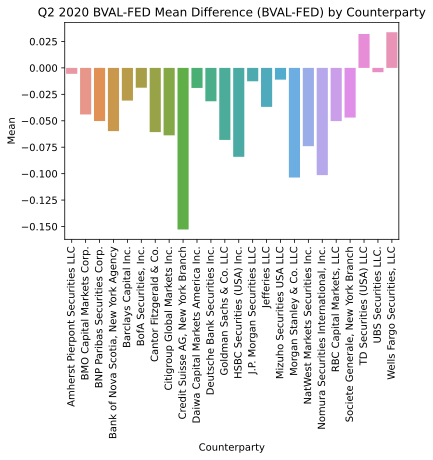

In [32]:
# Barplot of Counterparty table means with Counterparty labels
import seaborn as sns

sns.barplot(x='Counterparty', y='Mean', data=counterparty_statistics_df)

# Set x-axis labels to be vertical
plt.xticks(rotation=90)

# Set the x-axis label
plt.xlabel('Counterparty')

# Set the y-axis label
plt.ylabel('Mean')

plt.title("Q2 2020 BVAL-FED Mean Difference (BVAL-FED) by Counterparty")

# Show the plot
plt.show()

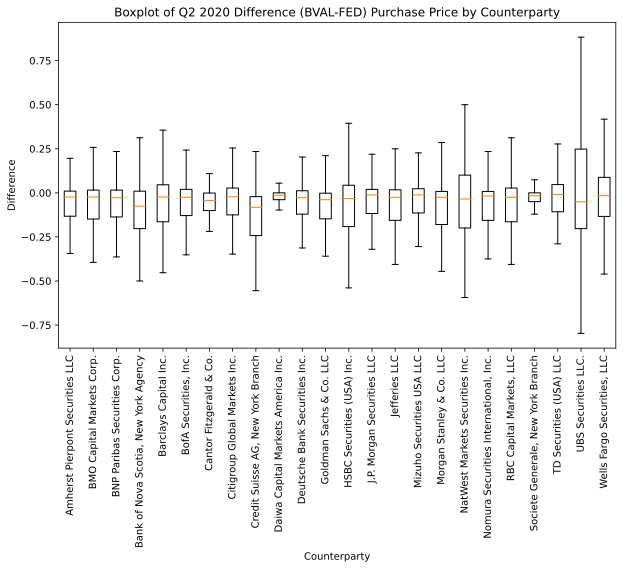

In [33]:
# Group the data by "Counterparty"
grouped = df.groupby('Counterparty')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the box plots for each counterparty
for counterparty, data in grouped:
    index = counterparty_statistics_df[counterparty_statistics_df['Counterparty'] == counterparty].index[0]
    ax.boxplot(data['DIFFERENCE'], positions=[index], widths=0.5, showfliers=False)

# Set the x-axis labels
ax.set_xticklabels(counterparty_statistics_df['Counterparty'], rotation=90)
ax.set_xlabel('Counterparty')
ax.set_ylabel('Difference')

# Add a title to the plot
plt.title("Boxplot of Q2 2020 Difference (BVAL-FED) Purchase Price by Counterparty")

# Show the plot
plt.show()


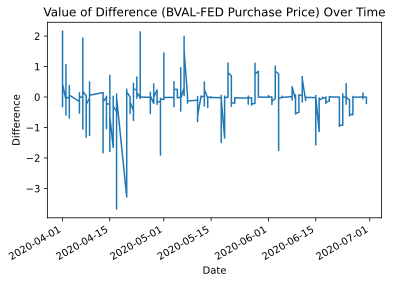

In [34]:
# Convert the YYMMDD_DATE column to a Pandas datetime object
df['YYMMDD_DATE'] = pd.to_datetime(df['YYMMDD_DATE'], format='%y%m%d')

# Set the YYMMDD_DATE column as the index
df = df.set_index('YYMMDD_DATE')

# Extract only the data between April 1, 2020 and June 30, 2020
df = df['2020-04-01':'2020-06-30']

# Plot the value of the "DIFFERENCE" column over time
df['DIFFERENCE'].plot()

# Add a title and labels to the plot
plt.title("Value of Difference (BVAL-FED Purchase Price) Over Time")
plt.xlabel("Date")
plt.ylabel("Difference")

# Show the plot
plt.show()


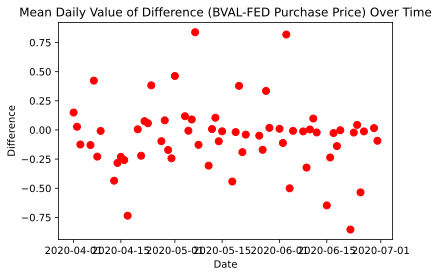

In [35]:
# Extract only the data between April 1, 2020 and June 30, 2020
df = df['2020-04-01':'2020-06-30']

# Resample the data to the daily frequency and calculate the mean value
df_resampled = df['DIFFERENCE'].resample('D').mean()

# Create a scatter plot of the mean daily value of the "DIFFERENCE" column
plt.scatter(df_resampled.index, df_resampled, s=50, c='red')

# Add a title and labels to the plot
plt.title("Mean Daily Value of Difference (BVAL-FED Purchase Price) Over Time")
plt.xlabel("Date")
plt.ylabel("Difference")

# Show the plot
plt.show()

<ipython-input-36-754a7ec36e4c>:11: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  z = np.polyfit(df_resampled.index.astype(int), df_resampled, 1)
<ipython-input-36-754a7ec36e4c>:13: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  plt.plot(df_resampled.index, p(df_resampled.index.astype(int)), 'b-')


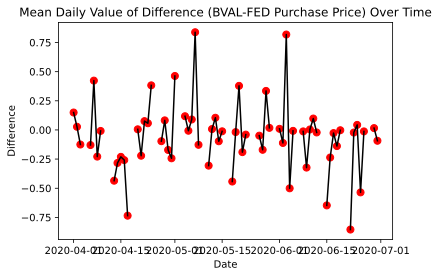

In [36]:
# Extract only the data between April 1, 2020 and June 30, 2020
df = df['2020-04-01':'2020-06-30']

# Resample the data to the daily frequency and calculate the mean value
df_resampled = df['DIFFERENCE'].resample('D').mean()

# Create a scatter plot of the mean daily value of the "DIFFERENCE" column
plt.scatter(df_resampled.index, df_resampled, s=50, c='red')

# Fit a trendline to the data
z = np.polyfit(df_resampled.index.astype(int), df_resampled, 1)
p = np.poly1d(z)
plt.plot(df_resampled.index, p(df_resampled.index.astype(int)), 'b-')

# Connect the dots with a line
plt.plot(df_resampled.index, df_resampled, '-', c='black')

# Add a title and labels to the plot
plt.title("Mean Daily Value of Difference (BVAL-FED Purchase Price) Over Time")
plt.xlabel("Date")
plt.ylabel("Difference")

# Show the plot
plt.show()
